In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

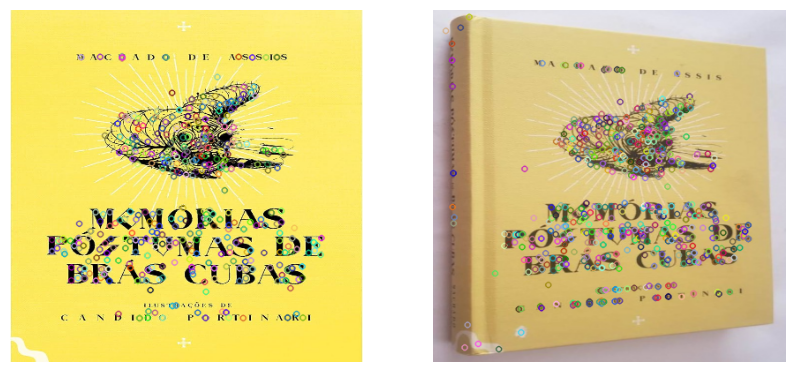

In [2]:
# extrair pontos e descritores SIFT
img1 = cv2.imread("../imagens/livro1.jpg")
img2 = cv2.imread("../imagens/livro2.jpg")

img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


def get_SIFT_descriptors(img):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    return kp, des


kp1, des1 = get_SIFT_descriptors(img_gray1)
kp2, des2 = get_SIFT_descriptors(img_gray2)

img1_keypoints = cv2.drawKeypoints(img1, kp1, None)
img2_keypoints = cv2.drawKeypoints(img2, kp2, None)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_keypoints, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2_keypoints, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

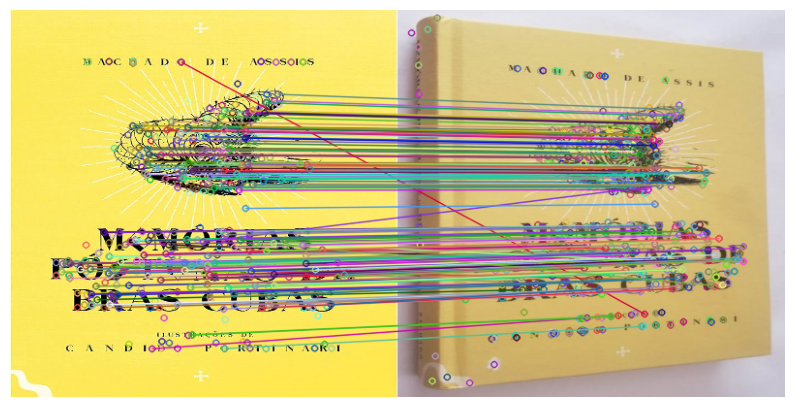

In [18]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Desenhe os matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [28]:
def homografia(matches):
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

    A = np.zeros((2*len(matches), 9))
    for i in range(len(matches)):
        x1, y1 = src_pts[i][0]
        x2, y2 = dst_pts[i][0]
        A[i] = np.array([-x1, -y1, -1, 0, 0, 0, x1*x2, y1*x2, x2])
        A[i+len(matches)] = np.array([0, 0, 0, -x1, -y1, -1, x1*y2, y1*y2, y2])
    

homografia(good_matches)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.44729431e+02
 -2.73345703e+02 -1.00000000e+00  8.83944766e+04  7.00904766e+04
  2.56416962e+02]
